<a href="https://colab.research.google.com/github/Areej73/Prediction-of-Product-Sales/blob/main/Prediction_of_product_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of product sales

- author: Areej Taha

## project overview
This  project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.


## Load and Inspect Data

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_sales.shape

(8523, 12)

- the Data Frame cosists of 8523  rows and 12 features (columns)

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- we have 7 categorical columns and 8 numeric columns:(1 is integer type and the rest are floats ) .Only one column has a wrong data type

In [7]:
df_sales = df_sales.astype({'Outlet_Establishment_Year':'object'})
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


- all datatypes suits the features now

## Clean Data
- after loading the data we need to clean it and prepare it for the modeling phase . the cleaning process will depend on the answers to these questions :    
 - How many rows and columns?

 - What are the datatypes of each variable?

 - Are there duplicates? If so, drop any duplicates.

 - Identify missing values.

   - Decide on how to address the missing values and do it! (This requires your
   judgement, so explain your choice).

   - Confirm that there are no missing values after addressing them.

 - Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

 - For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [8]:
df_sales.duplicated().sum()

0

No duplicates to handle

In [9]:
# inspecting missing values :
s_missing = df_sales.isna().sum()
s_missing

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [10]:
# adding a filter to view oly the columns with missing values :
s_missing[s_missing > 0]


,0
Item_Weight,1463
Outlet_Size,2410


both of Item_Weight and Outlet_Size columns  contain missing values

In [11]:
# find the percentage of missing values for each column :
s_missing[s_missing > 0] / len(df_sales) * 100

,0
Item_Weight,17.165317
Outlet_Size,28.276428


since we have high percentage of missing values for both columns , dropping rows with null values will not be the choice

In [12]:
missing_weight_filter = df_sales['Item_Weight'].isna()
df_sales[missing_weight_filter]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [13]:
#df_sales['Item_Type'].value_counts()
#thought for handeling missing values is to impute the mean of weights according to the item _ type  category each item belongs to :

In [14]:
#fill the missing values with a place holder value -1
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [15]:
df_sales['Item_Weight'].isna().sum()

0

In [16]:
df_sales['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [17]:
df_sales['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [18]:
df_sales.groupby('Outlet_Size')['Outlet_Identifier'].value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: count, dtype: int64

In [19]:
# handling missing Outlets sizes
null_values_filter = df_sales['Outlet_Size'].isna()
null_values_df = df_sales[null_values_filter]
null_values_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [20]:
# Fill missing values in 'Outlet_Size' with the string 'missing'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('missing')

# Count the occurrences of each unique value in 'Outlet_Size'
outlet_size_counts = df_sales['Outlet_Size'].value_counts(dropna=False)

# Display the result
print(outlet_size_counts)


Outlet_Size
Medium     2793
missing    2410
Small      2388
High        932
Name: count, dtype: int64


In [21]:
df_sales['Outlet_Size'].isna().sum()

0

In [22]:
# fixing any incosistencies
cat_cols = df_sales.select_dtypes('object').columns
cat_cols




Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [23]:
for col in cat_cols:
  print(f"value counts for {col}:")
  print(df_sales[col].value_counts())
  print("\n")


value counts for Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


value counts for Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


value counts for Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


value counts for Outlet_Identifier:
Outlet_Identifier
OUT027    935
OU

In [24]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [25]:
# numeric columns
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [26]:
for col in num_cols:
  print(f"Descriptive statistics for  {col}:")
  print(df_sales[col].describe())
  print("\n \n \n ")

Descriptive statistics for  Item_Weight:
count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

 
 
 
Descriptive statistics for  Item_Visibility:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

 
 
 
Descriptive statistics for  Item_MRP:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

 
 
 
Descriptive statistics for  Item_Outlet_Sales:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, 

## Exploratory Data Analysis

### The goal of this is to help understanding the data as it relates to the products and outlets that play crucial roles in increasing sales.

 by creating exploratory visuals that might help  understand, explain, or model the data including :

 - Histograms to view the distributions of numerical features in your dataset.
 - Boxplots to view statistical summaries of numerical features in your dataset.
 - Countplots to view the frequency of each class of categorial features in your dataset.
 - Heatmap to view the correlation between features.

#### Categorical features exploratory visualizations:

In [27]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [57]:
df_sales[cat_cols].nunique()

,0
Item_Identifier,1559
Item_Fat_Content,2
Item_Type,16
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3
Outlet_Type,4


In [ ]:
ax = sns.countplot(data = df_sales , x = 'Item_Fat_Content')
ax.set_title('Item Fat Content Distribution')

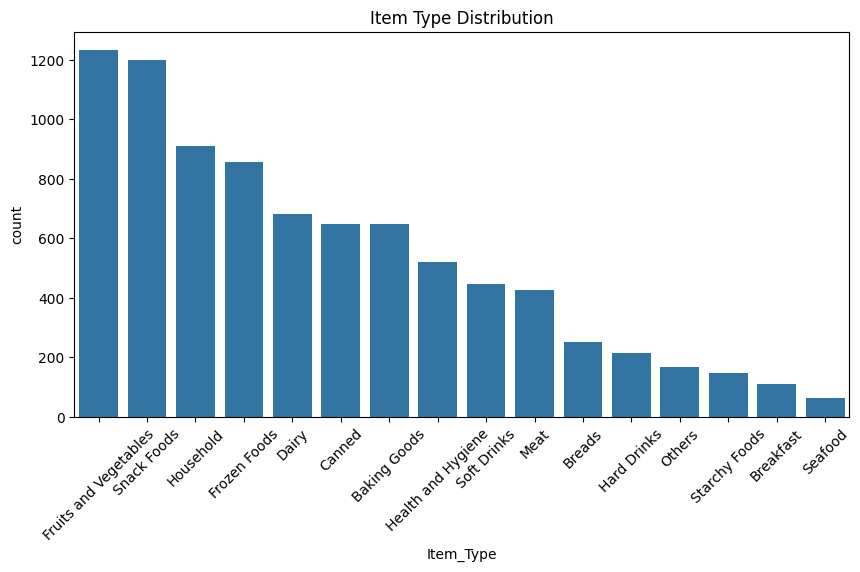

In [61]:
fig , ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(data = df_sales , x = 'Item_Type', order = df_sales['Item_Type'].value_counts().index)
ax.set_title('Item Type Distribution')
ax.tick_params(axis='x', labelrotation=45)

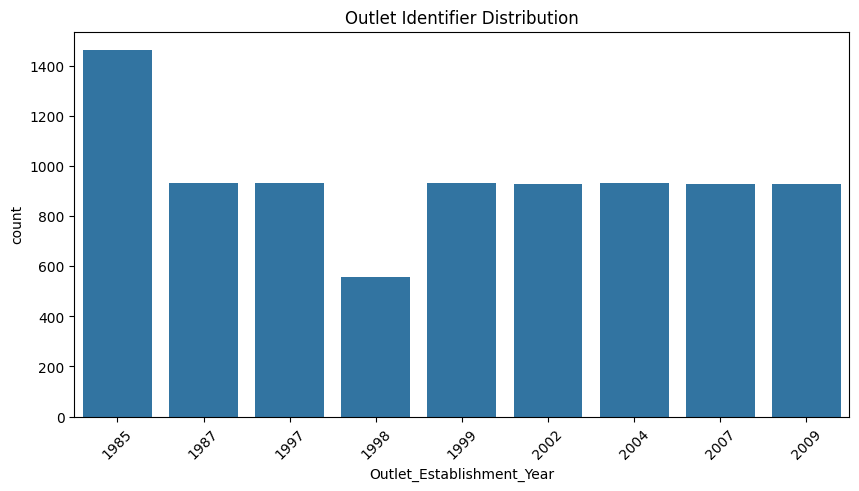

In [62]:
fig , ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(data = df_sales , x = 'Outlet_Establishment_Year')
ax.set_title('Outlet Identifier Distribution')
ax.tick_params(axis='x', labelrotation=45)

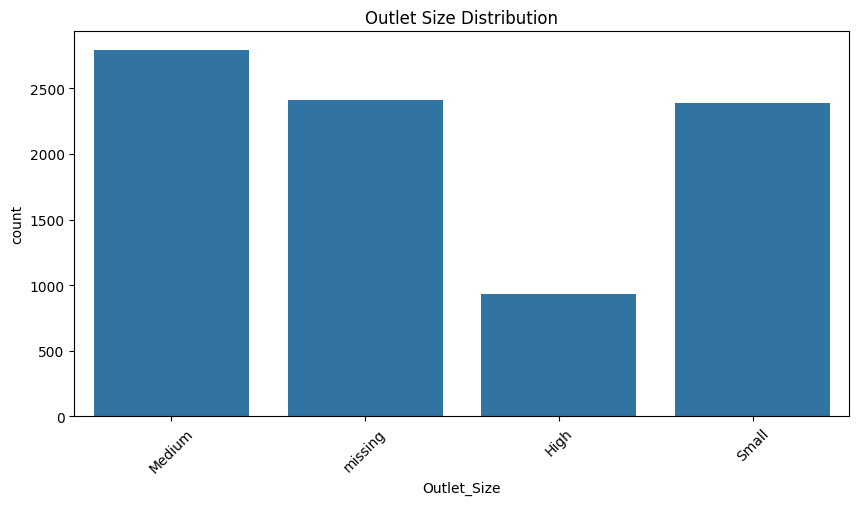

In [63]:
fig , ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(data = df_sales , x = 'Outlet_Size')
ax.set_title('Outlet Size Distribution')
ax.tick_params(axis='x', labelrotation=45)

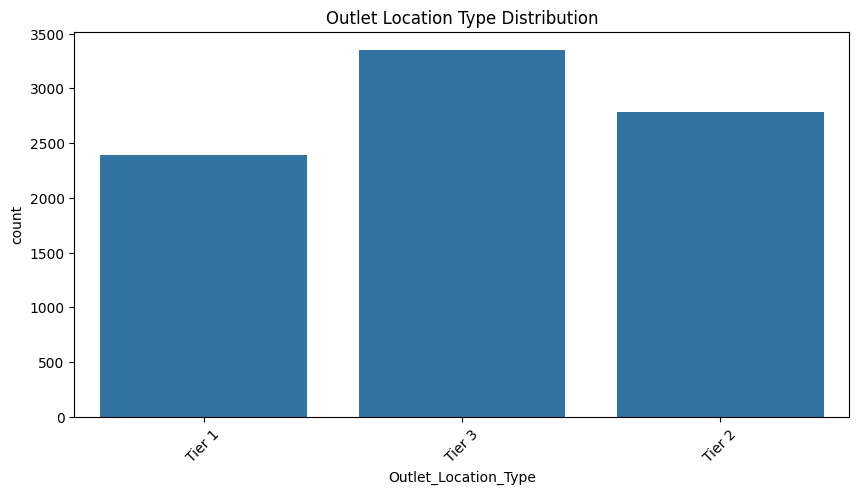

In [64]:
fig , ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(data = df_sales , x = 'Outlet_Location_Type')
ax.set_title('Outlet Location Type Distribution')
ax.tick_params(axis='x', labelrotation=45)

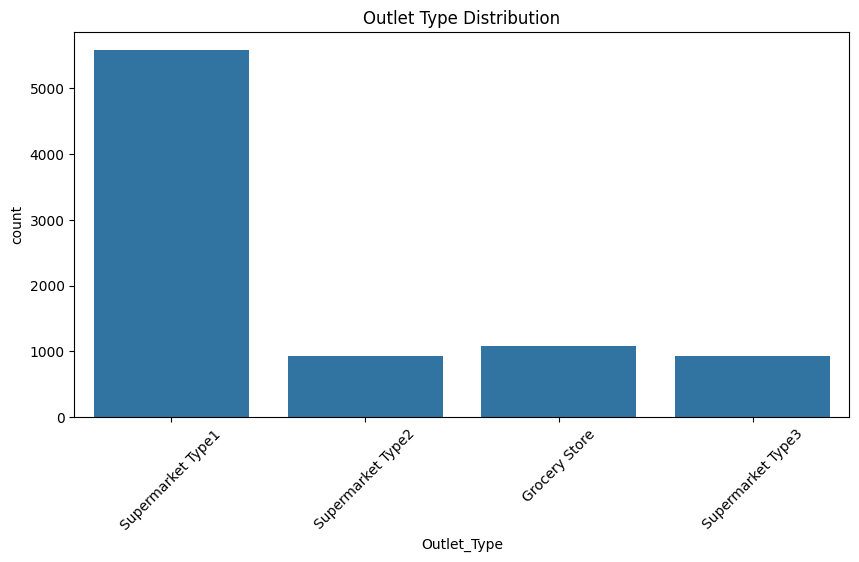

In [65]:
fig , ax = plt.subplots(figsize = (10,5))
ax= sns.countplot(data = df_sales , x= 'Outlet_Type')
ax.set_title('Outlet Type Distribution')
ax.tick_params(axis='x', labelrotation=45)

#### Numeric feature visualizations:

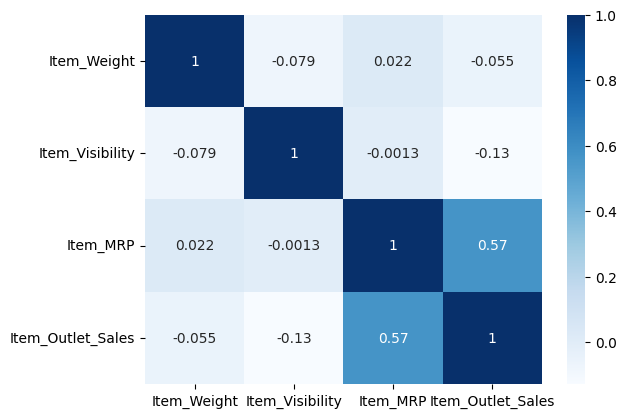

In [29]:
## finding the correlation :
corr = df_sales.corr(numeric_only=True)
ax = sns.heatmap(corr,cmap='Blues' , annot=True)

`heatmap shows that there is no  relation ships between the numeric columns in general except for Item MRP and Item outlet_sales but we have a moderate correlation cooficient between   `

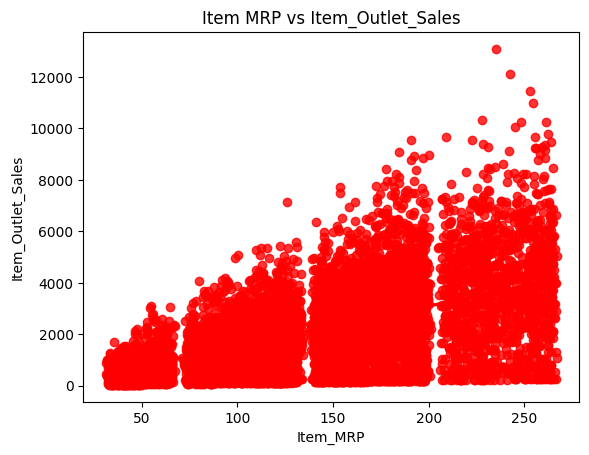

In [70]:
# plot the lm for Item MRP and Item outlet_sales
line_kws = dict(color='red')
scatter_kws = dict(edgecolor='blue')
ax= sns.regplot(data = df_sales , x = 'Item_MRP' , y = 'Item_Outlet_Sales',line_kws = line_kws , scatter_kws = line_kws )
ax.set_title('Item MRP vs Item_Outlet_Sales');

`the plot indicates that the data is clusstered `

In [30]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [31]:
# starting with Item_Weight
df_sales['Item_Weight'].describe()

,Item_Weight
count,8523.000000
mean,10.478936
std,6.720742
min,-1.000000
25%,6.650000
50%,11.000000
75%,16.000000
max,21.350000


 ** **

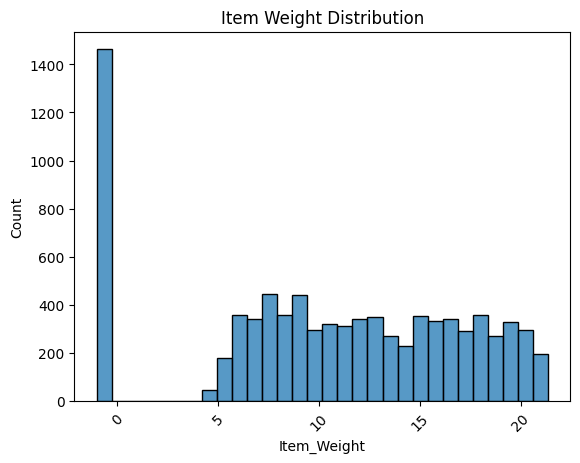

In [32]:
ax = sns.histplot(data = df_sales , x = 'Item_Weight',bins = 30 )
ax.set_title('Item Weight Distribution')
ax.ticklabel_format(style='plain', axis='x')
ax.tick_params(axis='x', labelrotation=45)

 **negative weights are due to imputing missing values with "-1" ** as we can see it has the most repeatition , if we neglect them we can see that the data is distribued uniformly in this column

Text(0.5, 1.0, 'Item Weight Distribution')

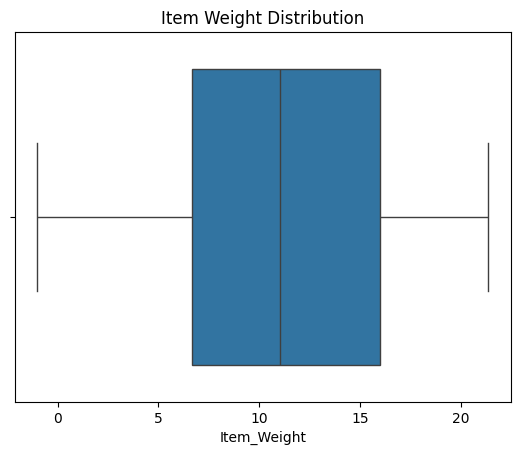

In [33]:
ax = sns.boxplot(data = df_sales , x = 'Item_Weight')
ax.set_title('Item Weight Distribution')


****

Since median line is near the center of the box , it indicates a relatively symmetrical distribution which meats what the histogram above shown


In [34]:
df_sales['Item_Visibility'].describe()

,Item_Visibility
count,8523.000000
mean,0.066132
std,0.051598
min,0.000000
25%,0.026989
50%,0.053931
75%,0.094585
max,0.328391


 **this column has a high standard deviation **

Text(0.5, 1.0, 'Item_Visibility Distribution')

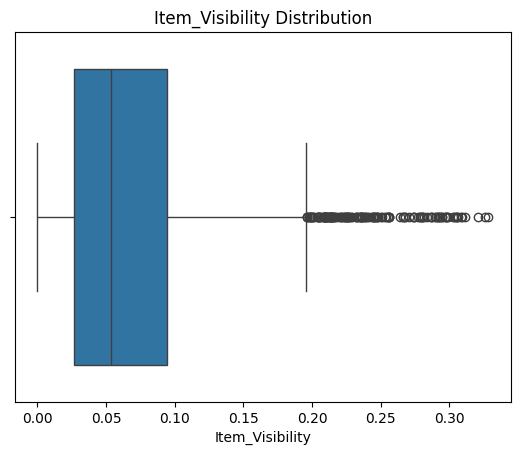

In [35]:
ax = sns.boxplot(data = df_sales , x = 'Item_Visibility')
ax.set_title('Item_Visibility Distribution')


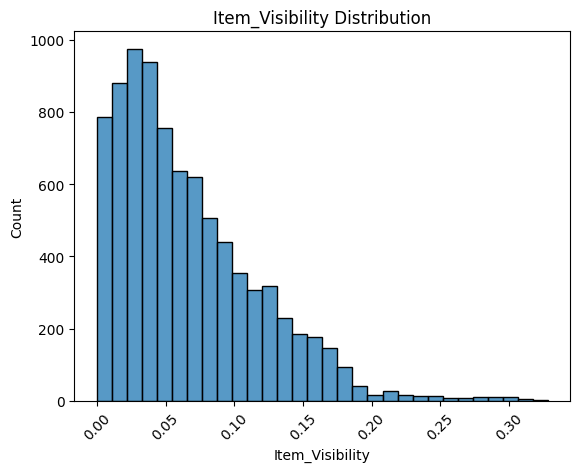

In [36]:
ax = sns.histplot(data = df_sales , x = 'Item_Visibility',bins = 30 )
ax.set_title('Item_Visibility Distribution')
ax.ticklabel_format(style='plain', axis='x')
ax.tick_params(axis='x', labelrotation=45)

both of visualization indicates that the data is skewed (right_skewness)

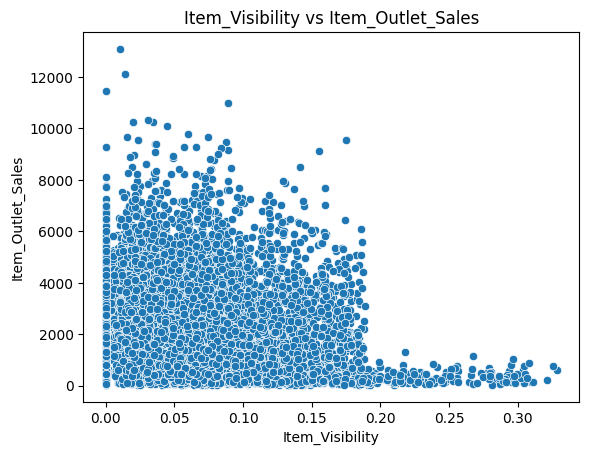

In [71]:
## studying the relationship between Item visibility and sales
ax = sns.scatterplot(data = df_sales , x = 'Item_Visibility' , y = 'Item_Outlet_Sales')
ax.set_title('Item_Visibility vs Item_Outlet_Sales');

`no relationship at all `

In [38]:
df_sales['Item_MRP'].describe()

,Item_MRP
count,8523.000000
mean,140.992782
std,62.275067
min,31.290000
25%,93.826500
50%,143.012800
75%,185.643700
max,266.888400


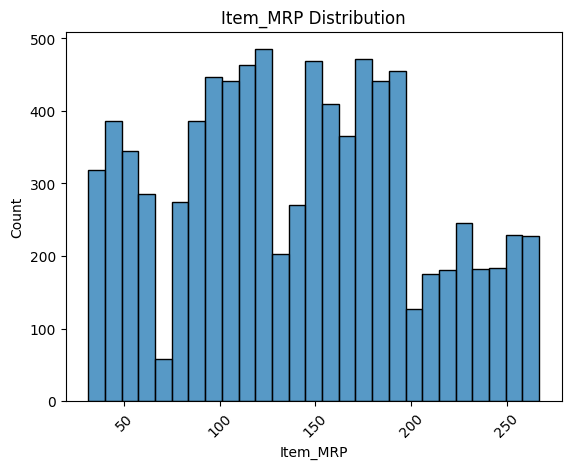

In [39]:
ax = sns.histplot(data = df_sales , x = 'Item_MRP' )
ax.set_title('Item_MRP Distribution')
ax.ticklabel_format(style='plain', axis='x')
ax.tick_params(axis='x', labelrotation=45)

Text(0.5, 1.0, 'Item_MRP Distribution')

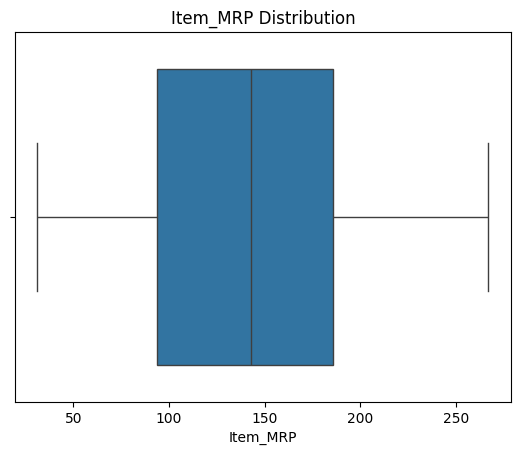

In [40]:
ax = sns.boxplot(data = df_sales , x = 'Item_MRP')
ax.set_title('Item_MRP Distribution')


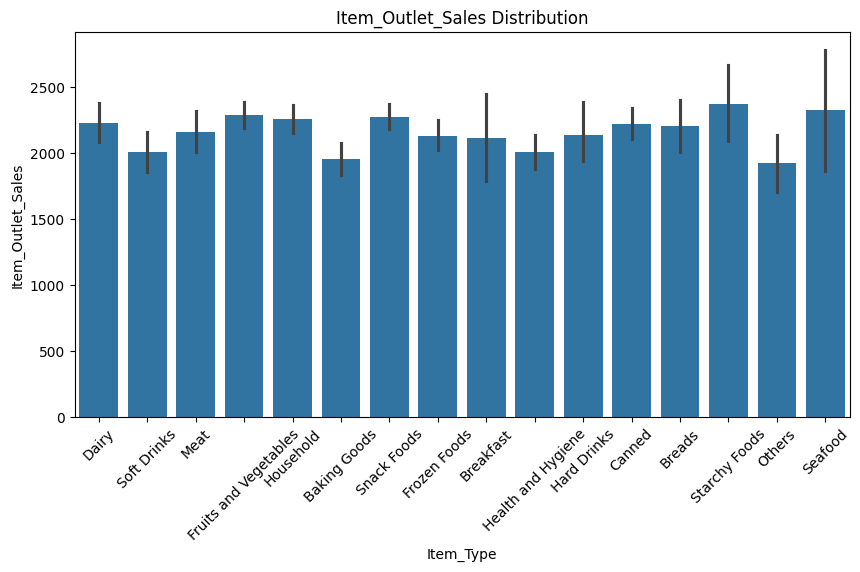

In [72]:
# find the most saled category
fig , ax = plt.subplots(figsize = (10,5))
ax= sns.barplot(data = df_sales , x= 'Item_Type', y= 'Item_Outlet_Sales' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)



`as a measure of a thumb sales ar almost the same for all item types `

In [42]:
df_sales.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               935
                           OUT019               528
1987                       OUT013               932
1997                       OUT046               930
1998                       OUT010               555
1999                       OUT049               930
2002                       OUT045               929
2004                       OUT035               930
2007                       OUT017               926
2009                       OUT018               928
Name: count, dtype: int64

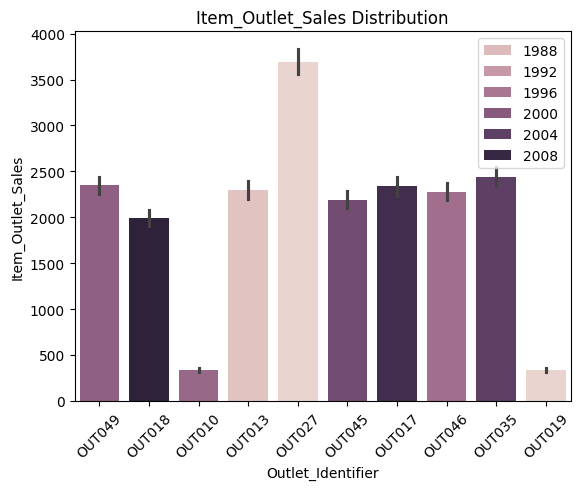

In [43]:
## check the relationship of establishment year of the stores with the sales
ax = sns.barplot(data = df_sales , x= 'Outlet_Identifier', y= 'Item_Outlet_Sales', hue= 'Outlet_Establishment_Year' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)
ax.legend(loc = 'upper right');


` eventhough the best sales(highest sales) refers to the oldest store by construction year has the highest sales, the other stores, despite varying construction years, have relatively similar sales."`

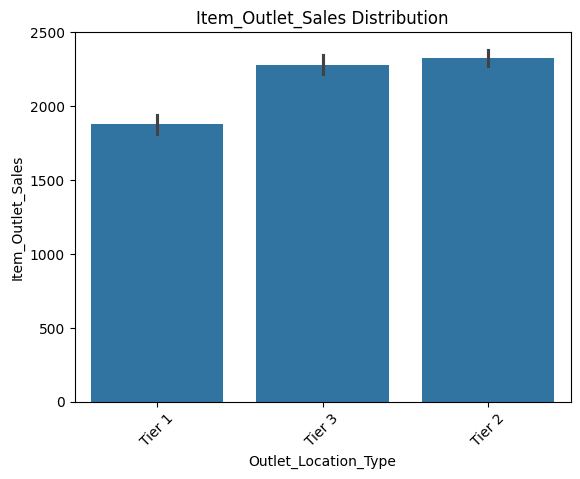

In [44]:
#visualize the outlit location with sales
ax = sns.barplot(data = df_sales , x= 'Outlet_Location_Type', y= 'Item_Outlet_Sales' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

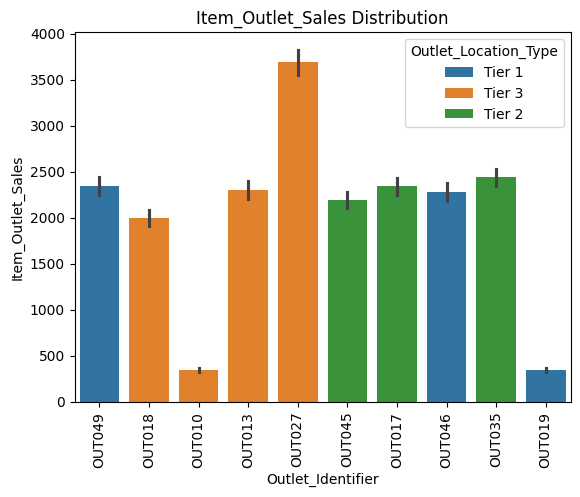

In [49]:
#visualize the outlit location with sales
ax = sns.barplot(data = df_sales , x='Outlet_Identifier' ,y= 'Item_Outlet_Sales',  hue = 'Outlet_Location_Type' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=90)

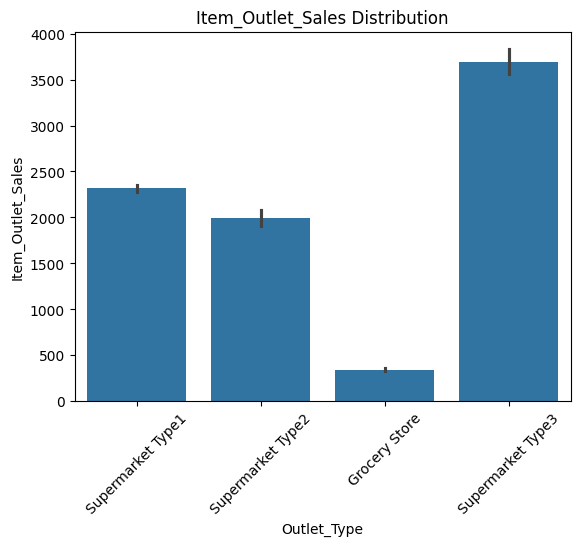

In [50]:
## plot outlit type vs sales
ax = sns.barplot(data = df_sales , x= 'Outlet_Type', y= 'Item_Outlet_Sales' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

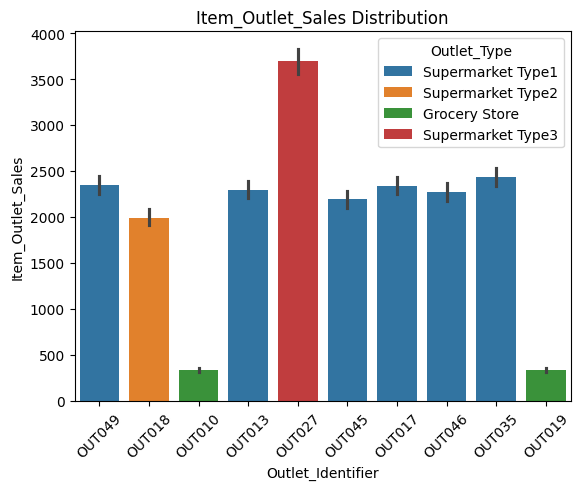

In [51]:
ax = sns.barplot(data = df_sales , x='Outlet_Identifier' ,y= 'Item_Outlet_Sales',  hue = 'Outlet_Type' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

`grocery outlits have the minimum sales`

In [52]:
# find out the type of each outlet
df_sales.groupby('Outlet_Type')['Outlet_Identifier'].value_counts()

Outlet_Type        Outlet_Identifier
Grocery Store      OUT010               555
                   OUT019               528
Supermarket Type1  OUT013               932
                   OUT035               930
                   OUT046               930
                   OUT049               930
                   OUT045               929
                   OUT017               926
Supermarket Type2  OUT018               928
Supermarket Type3  OUT027               935
Name: count, dtype: int64

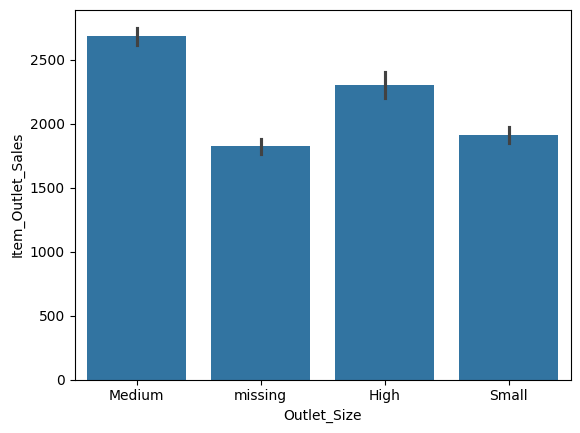

In [53]:
fig , ax = plt.subplots()
ax = sns.barplot(data = df_sales , x = 'Outlet_Size', y = 'Item_Outlet_Sales')

`ignoring the missing record ,the size is not a factor as we can notice until
this point `


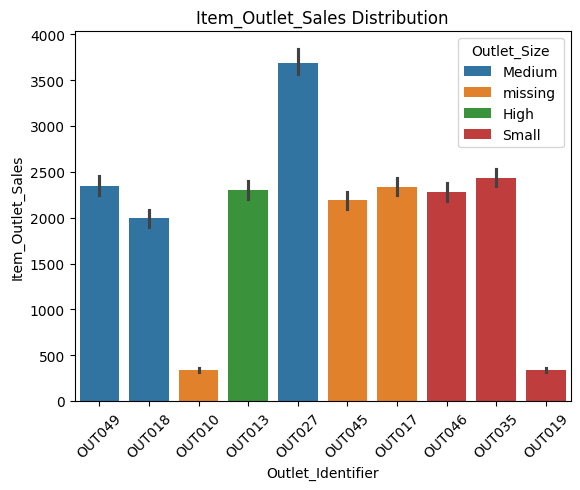

In [55]:
ax = sns.barplot(data = df_sales , x='Outlet_Identifier' ,y= 'Item_Outlet_Sales',  hue = 'Outlet_Size' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

`the percentage of missing values is large so we need to figue them out before we come with cocnlusions about the relationship between the outlet size and sales ,but in general  as in the plot we can see that the size could be a factor of raising sales
`

## Feature Inspection
